In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from CRUD import *
connection = connectToDatabase("../resources/ikon.db")

In [3]:
artists_count = connection.execute("SELECT Count(*) FROM artists").fetchone()[0]
exhibitions_count = connection.execute("SELECT Count(*) FROM exhibitions").fetchone()[0]
galleries_count = connection.execute("SELECT Count(*) FROM galleries").fetchone()[0]

print("artists:\t", artists_count) 
print("exhibitions:\t",exhibitions_count) 
print("galleries:\t",galleries_count)


artists:	 10386
exhibitions:	 8517
galleries:	 316


# Search

In [44]:
import ipywidgets as widgets
from IPython.display import display, HTML
from ipywidgets import interact

sql_artist = '''
SELECT DISTINCT a.name FROM artists_exhibitions ae
JOIN artists a ON a.id = ae.artist_id
JOIN exhibitions e on e.id = ae.exhibition_id
JOIN galleries g ON g.id = e.gallery_id
WHERE e.title LIKE ?
AND a.name LIKE ?
AND g.name LIKE ?
'''

sql_gallery = '''
SELECT DISTINCT g.name FROM artists_exhibitions ae
JOIN artists a ON a.id = ae.artist_id
JOIN exhibitions e on e.id = ae.exhibition_id
JOIN galleries g ON g.id = e.gallery_id
WHERE e.title LIKE ?
AND a.name LIKE ?
AND g.name LIKE ?
'''

sql_exhibition = '''
SELECT DISTINCT e.title FROM artists_exhibitions ae
JOIN artists a ON a.id = ae.artist_id
JOIN exhibitions e on e.id = ae.exhibition_id
JOIN galleries g ON g.id = e.gallery_id
WHERE e.title LIKE ?
AND a.name LIKE ?
AND g.name LIKE ?
'''

@interact
def search(artist="%%", exhibition="%%", gallery="%%"):
    artists = connection.execute(sql_artist, (exhibition, artist, gallery)).fetchall()
    exhibitions = connection.execute(sql_exhibition, (exhibition, artist, gallery)).fetchall()
    galleries = connection.execute(sql_gallery, (exhibition, artist, gallery)).fetchall()
    
    artistsWidget = widgets.Output()
    with artistsWidget:
        display(pd.DataFrame(artists))
        
    exhibitionsWidget = widgets.Output()
    with exhibitionsWidget:
        display(pd.DataFrame(exhibitions))
        
    galleriesWidget = widgets.Output()
    with galleriesWidget:
        display(pd.DataFrame(galleries))
    

    return widgets.HBox([
        artistsWidget, exhibitionsWidget, galleriesWidget
    ])

interactive(children=(Text(value='%%', description='artist'), Text(value='%%', description='exhibition'), Text…

In [43]:
import ipywidgets as widgets
from IPython.display import display, HTML
from ipywidgets import interact

sql = '''
SELECT a.id, a.name, COUNT(ae.artist_id) as No_exhibitions
FROM artists_exhibitions ae
JOIN artists a ON a.id = ae.artist_id
WHERE a.name LIKE ?
GROUP BY ae.artist_id
ORDER BY No_exhibitions DESC;
'''

@interact
def showArtists(artist="%%"):
    df = pd.DataFrame( connection.execute(sql, (artist.lower(), )).fetchall(), columns= ["id", "name", "no exhibitions"])
    display(df)



interactive(children=(Text(value='%%', description='artist'), Output()), _dom_classes=('widget-interact',))

# Analyze

<BarContainer object of 10386 artists>

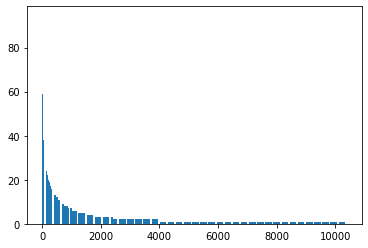

In [23]:
# exhibition distribution amoung artists
sql = '''
SELECT COUNT(ae.artist_id) as c
FROM artists_exhibitions ae
JOIN artists a ON a.id = ae.artist_id
GROUP BY ae.artist_id
ORDER BY c DESC;
'''
counts = [r[0] for r in connection.execute(sql).fetchall()]
plt.bar(list(range(len(counts))), counts)

<BarContainer object of 7 artists>

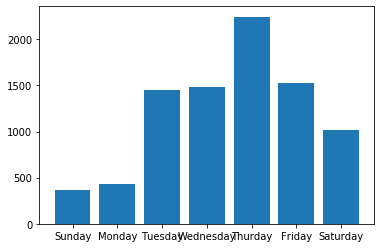

In [5]:
# exhibitions distribution amoung weekdays
sql = '''
SELECT strftime("%w", date), COUNT(*)
FROM exhibitions
GROUP BY strftime("%w", date)
'''
counts = [r[1] for r in connection.execute(sql).fetchall()]
labels = ["Sunday","Monday","Tuesday","Wednesday","Thurday","Friday","Saturday"]
plt.bar(labels, counts)

<BarContainer object of 12 artists>

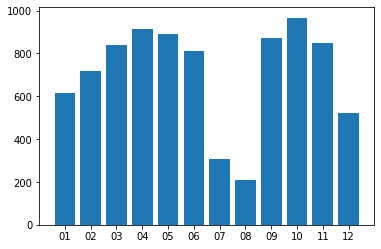

In [6]:
# exhibitions distribution amoung months
sql = '''
SELECT strftime("%m", date), COUNT(*)
FROM exhibitions
GROUP BY strftime("%m", date)
'''
labels = [r[0] for r in connection.execute(sql).fetchall()]
counts = [r[1] for r in connection.execute(sql).fetchall()]
plt.bar(labels, counts)

<BarContainer object of 9 artists>

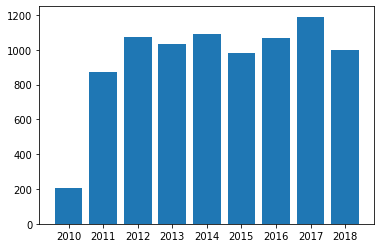

In [7]:
# exhibitions distribution through years
sql = '''
SELECT strftime("%Y", date), COUNT(*)
FROM exhibitions
GROUP BY strftime("%Y", date)
'''
labels = [r[0] for r in connection.execute(sql).fetchall()]
counts = [r[1] for r in connection.execute(sql).fetchall()]
plt.bar(labels, counts)